# Procena darovitosti učenika

U ranijim analizama i izveštaju prikazane su prirode podataka iz ovog dataseta, s toga će se ova sveska baviti isključivo strategijama identifikacije anomalija. U nastavku će biti navedeni neki od popularnih pristupa ovom problemu. Izabrani algoritmi biće primenjeni nad podacima, a zatim ćemo probati da što bolje razumemo rezultate odnosno otkrivene anomalije.

Za početak učitavamo osnovne module, podešavamo okruženje i sređujemo osnovni dataset.

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
from matplotlib import pyplot as plt
%matplotlib inline

In [153]:
import pandas as pd

In [154]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

In [155]:
df = pd.read_excel('data/data Procena darovitosti.xlsx', sheet_name='Sheet1')

In [156]:
df.head()

,RB,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl
0,1,1,3,2,44,33,55,48,57,55,49,32,38,1,1,49,44,60,50,57,60,56,32,46,1,2,54,45,53,48,56,60,62,46,53,1,2,44,39,54,42,55,49,54,40,39,30,13,17,10.0
1,2,1,3,2,50,40,44,42,38,60,59,38,37,1,2,46,57,50,44,28,67,65,40,33,1,2,46,49,52,43,42,68,65,47,37,1,2,45,42,45,37,36,65,63,44,33,36,12,16,30.0
2,3,1,3,2,42,42,36,43,40,56,34,33,29,1,1,41,34,27,44,38,50,50,31,39,1,2,44,44,40,48,45,60,67,35,36,2,2,36,31,24,36,34,45,37,29,25,36,13,16,6.0
3,4,1,3,1,50,60,32,28,34,46,52,47,48,1,1,52,49,50,48,45,49,51,52,29,2,1,55,59,54,42,55,64,68,48,54,2,1,52,44,47,55,60,45,45,51,37,31,12,10,30.0
4,5,1,3,1,46,45,43,61,53,51,56,39,52,1,2,40,38,44,58,44,58,61,36,37,1,1,51,44,43,58,51,63,58,55,41,2,1,54,41,37,54,41,52,57,51,46,33,5,13,15.0


In [157]:
df.set_index('RB', inplace=True)

In [158]:
df.describe()

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.158940,2.841060,1.675497,57.033113,57.033113,58.754967,56.066225,54.980132,63.801325,62.152318,49.231788,51.072848,1.754967,1.377483,54.403974,53.629139,56.417219,55.754967,51.774834,62.099338,60.854305,46.450331,47.629139,1.450331,1.476821,57.456954,54.013245,55.662252,54.026490,53.576159,62.635762,62.543046,48.509934,51.125828,1.463576,1.490066,57.403974,56.655629,58.589404,57.344371,55.046358,63.344371,63.668874,52.523179,53.019868,32.231788,9.940397,14.039735,76.000000
std,0.366837,0.448594,0.820972,7.740299,9.427914,9.519080,10.430512,10.436136,9.328823,8.379139,10.126167,10.037330,0.951959,0.486371,7.534082,8.808039,9.256607,8.756687,10.566723,8.552391,8.902732,10.832475,10.604160,0.499183,0.501125,8.058730,10.631392,9.741244,9.829172,9.926018,8.336653,9.532915,11.607967,12.457557,0.500331,0.539970,7.257345,10.108113,9.706542,9.488974,10.563041,8.217904,7.888998,11.488449,12.171809,4.302625,3.774002,2.430036,43.692181
min,1.000000,1.000000,1.000000,31.000000,33.000000,24.000000,5.000000,21.000000,30.000000,34.000000,23.000000,21.000000,1.000000,1.000000,36.000000,24.000000,27.000000,24.000000,25.000000,24.000000,32.000000,17.000000,22.000000,1.000000,1.000000,38.000000,29.000000,31.000000,28.000000,28.000000,33.000000,22.000000,20.000000,17.000000,1.000000,1.000000,36.000000,31.000000,24.000000,21.000000,30.000000,42.000000,37.000000,21.000000,23.000000,11.000000,0.000000,8.000000,1.000000
25%,1.000000,3.000000,1.000000,52.000000,52.000000,55.000000,49.500000,49.500000,60.000000,56.500000,42.000000,46.000000,1.000000,1.000000,49.000000,48.000000,51.000000,50.000000,44.000000,56.500000,56.000000,40.000000,40.000000,1.000000,1.000000,51.000000,46.000000,49.000000,47.000000,47.000000,59.000000,58.000000,40.000000,43.000000,1.000000,1.000000,53.000000,49.000000,53.000000,51.000000,48.000000,59.000000,59.000000,45.000000,45.000000,31.000000,8.000000,12.000000,37.500000
50%,1.000000,3.000000,1.000000,58.000000,58.000000,62.000000,58.000000,56.000000,66.000000,64.000000,49.000000,52.000000,1.000000,1.000000,55.000000,54.000000,57.000000,56.000000,54.000000,63.000000,61.000000,47.000000,47.000000,1.000000,1.000000,58.000000,54.000000,56.000000,55.000000,54.000000,63.000000,64.000000,48.000000,53.000000,1.000000,1.000000,58.000000,58.000000,60.000000,58.000000,56.000000,65.000000,64.000000,53.000000,53.000000,33.000000,10.000000,14.000000,74.500000
75%,1.000000,3.000000,2.000000,63.000000,64.000000,66.000000,64.000000,62.000000,71.000000,68.500000,58.000000,59.000000,3.000000,2.000000,60.000000,59.000000,64.000000,62.000000,60.000000,69.000000,68.000000,54.000000,56.000000,2.000000,2.000000,64.000000,63.000000,63.000000,61.000000,60.000000,68.500000,70.000000,55.500000,60.500000,2.000000,2.000000,62.000000,65.000000,66.000000,63.500000,63.000000,70.000000,70.000000,60.000000,63.000000,35.000000,13.000000,16.000000,113.000000
max,2.000000,3.000000,3.000000,70.000000,73.000000,72.000000,73.000000,75.000000,75.000000,75.000000,72.000000,72.000000,3.000000,2.000000,72.000000,71.000000,73.000000,74.000000,72.000000,75.000000,75.000000,69.000000,71.000000,2.000000,2.

## Strategije detekcije anomalija

U nastavku biće navedene i ukratko objašnjene strategije i algoritmi koje planiram da koristim za detekciju anomalija nad učitanim skupom podataka.

### 1. Univarijantne strategije

Ova grupa strategija jeste znatno jednostavnija od naredne. Pri ovom pristupu posmatramo svaki atribut posebno, ne i njihove kombinacije. Možemo probati 2 jako slična pristupa:
1. Identifikacija anomalija na osnovu z-score
2. Identifikacija anomalija na osnovu IQR-a (interkvartalni opseg)

Oba pristupa su dobra samo u slučaju da su varijable normalno raspoređene, a rade loše se `iskošenim` raspodelama. S obzirom da u našem skupu postoji par desno-iskošenih raspodela, ove metode ćemo probati samo kao početnu tačku: postavićemo veliki prag kako bi identifikovali samo one koji imaju znatno veće odstupanje po nekom atributu (to obično budu neke greške u upisivanju podatka).

Evo intuicije iza oba pristupa:

#### 1.1. Z-score based anomaly detection
Prvi pristup se zasniva na tome da, pod pretpostavkom da je varijabla normalno raspoređena, posmatramo anomalije kao tačke sa najvećim z-score-om (z score = koliko standardnih devijacija je tačka udaljena od srednje vrednosti). 


$$  \frac{x_i–mean(x)}{stdev(x)} $$

In [159]:
def outliers_z_score(ys, threshold = 3):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys] # primenjujemo formulu
    return np.where(np.abs(z_scores) > threshold) # vraća vrednosti koje se nalaze van 3σ

In [160]:
outliers = {}
for col in df.columns:
    outliers[col] = list(outliers_z_score(df[col], 3)[0])
outliers

{'naspol': [],
 'nasss': [10, 11, 82, 83, 97],
 'nastrs': [],
 'nasvl': [92],
 'naslm': [],
 'nasvp': [89, 92],
 'nastk': [146],
 'nasmr': [147],
 'nasinter': [89, 90],
 'nasintra': [2],
 'naspriro': [],
 'nastfil': [89],
 'rodss': [],
 'rodpol': [],
 'rodvl': [],
 'rodlm': [11],
 'rodvp': [2],
 'rodtk': [11, 54],
 'rodmr': [],
 'rodintr': [149],
 'rodintra': [149],
 'rodprir': [],
 'rodfil': [],
 'vrspol': [],
 'vrsray': [],
 'vrsvl': [],
 'vrslm': [],
 'vrsvp': [],
 'vrstk': [],
 'vrsmr': [],
 'vrsintr': [31, 116],
 'vrsintra': [30],
 'vrsprir': [],
 'vrsfil': [],
 'ucepol': [],
 'ucenraz': [21],
 'ucevl': [],
 'ucelm': [],
 'ucevp': [2, 54],
 'ucetk': [11, 54],
 'ucemr': [],
 'uceinter': [],
 'uceintra': [2],
 'ucepriro': [],
 'ucefil': [],
 'rpm': [70, 77, 91],
 'vs': [],
 'shv': [],
 'Rnasvl': []}

Prethodno je prikazan rečnik odstupajućih vrednosti u svakoj od datih kolona. Zavisno od kolone, neke od identifikovanih izuzetaka mogu biti manje ili više informativni. Za početak, u koloni `nasss` koja govori o srednjoj stručnoj spremi nastavnika, pojavila su se 5 izuzetka. S obzirom da ova kolona nije ocena studenta već opisna karakteristika profesora, izuzeci u njoj sami po sebi nisu bitni, već mogu biti bitni tek ako se isti redovi pojave kao izuzeci u još nekim kolonama koje se tiču ocene. 

In [161]:
df.loc[outliers['nasss'], 'nasss']

RB
10    3
11    1
82    3
83    1
97    3
Name: nasss, dtype: int64

Primetimo da je većina profesora 2. stepena stručne spreme, dok su izuzeci profesori prvog i trećeg stepena. Proverićemo kako to utiče na druge osobine učenika:

In [162]:
nasss_outliers = {key: [] for key in outliers['nasss']}
for outlier in outliers['nasss']:
    for key in outliers.keys():
        if outlier in outliers[key]:
                nasss_outliers[outlier] = nasss_outliers[outlier] + [key]
nasss_outliers

{10: ['nasss'],
 11: ['nasss', 'rodlm', 'rodtk', 'ucetk'],
 82: ['nasss'],
 83: ['nasss'],
 97: ['nasss']}

Možemo zaključiti da stepen stručne spreme nastavnika nije imao veliki uticaj na ocene studenata, osim u slučaju učenika `11`. Taj učenik ima nastavnika prvog stepena, dok su mu ocene iz telesno-kinetičkih sposobnosti od strane njega samog i roditelja jako niske. Takođe, roditelj je ocenio jako nisko i logičko-matematičke osobine. 

In [163]:
anom_df = df.iloc[11, :]
anom_df['tip_anom'] = nasss_outliers[11]
anom_df[anom_df['tip_anom'] + ['rpm', 'shv']]

nasss     1
rodlm    24
rodtk    28
ucetk    28
rpm      36
shv      11
Name: 12, dtype: object

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4d4c8aff60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d4c8aff60>)

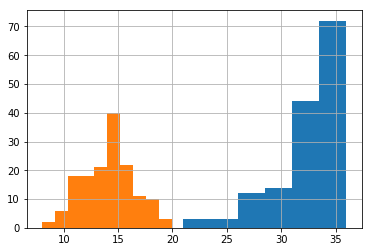

In [164]:
df.rpm.hist(), df.shv.hist()

Uvidom u rezultate testova ovog učenika vidimo da on u ostalim disciplina nije izuzetak, to jest ima rezultate slične ostalim učenicima. Ipak, na testovima nisu merene telesno-kinetičke osobine pa o tome ne možemo više zaključiti.

In [165]:
outliers_rb = [item for sublist in list(outliers.values()) for item in sublist]
outliers_rb = list(set(outliers_rb))

In [166]:
nasss_outliers = {rb: [] for rb in outliers_rb}
for outlier in outliers_rb:
    for key in outliers.keys():
        if outlier in outliers[key]:
                nasss_outliers[outlier] = nasss_outliers[outlier] + [key]
nasss_outliers

{97: ['nasss'],
 2: ['nasintra', 'rodvp', 'ucevp', 'uceintra'],
 70: ['rpm'],
 10: ['nasss'],
 11: ['nasss', 'rodlm', 'rodtk', 'ucetk'],
 91: ['rpm'],
 77: ['rpm'],
 82: ['nasss'],
 83: ['nasss'],
 146: ['nastk'],
 147: ['nasmr'],
 54: ['rodtk', 'ucevp', 'ucetk'],
 149: ['rodintr', 'rodintra'],
 116: ['vrsintr'],
 89: ['nasvp', 'nasinter', 'nastfil'],
 90: ['nasinter'],
 21: ['ucenraz'],
 92: ['nasvl', 'nasvp'],
 30: ['vrsintra'],
 31: ['vrsintr']}

In [167]:
multi_outliers = [key for key in nasss_outliers.keys() if len(nasss_outliers[key]) > 2]

In [168]:
multi_outliers = {k: nasss_outliers[k] for k in multi_outliers}
multi_outliers

{2: ['nasintra', 'rodvp', 'ucevp', 'uceintra'],
 11: ['nasss', 'rodlm', 'rodtk', 'ucetk'],
 54: ['rodtk', 'ucevp', 'ucetk'],
 89: ['nasvp', 'nasinter', 'nastfil']}

#### 1.2. IQR based anomaly detection
Drugi pristup posmatra interkvantilni opseg (iqr = razlika između prvog i trećeg kvantila). Sve tačke koje su ispod `quantile_1 - iqr` ili iznad `quantile_3 + iqr`, posmatraju se kao anomalije.

Više o ovim pristupima može se pročitati u [ovom blogu](http://colingorrie.github.io/outlier-detection.html).

In [169]:
def iqr_outliers(ys):
    quant1 = ys.quantile(.25)
    quant3 = ys.quantile(.75)
    iqr = quant3 - quant1
    min_out = list(np.where(ys < (quant1-iqr))[0]) 
    max_out = list(np.where(ys > (quant3+iqr))[0]) 
    return min_out + max_out

In [170]:
outliers = {}
for col in df.columns:
    outliers[col] = iqr_outliers(df[col])

In [171]:
outliers_rb = [item for sublist in list(outliers.values()) for item in sublist]
outliers_rb = list(set(outliers_rb))

In [172]:
nasss_outliers = {rb: [] for rb in outliers_rb}
for outlier in outliers_rb:
    for key in outliers.keys():
        if outlier in outliers[key]:
                nasss_outliers[outlier] = nasss_outliers[outlier] + [key]

In [173]:
multi_outliers = [key for key in nasss_outliers.keys() if len(nasss_outliers[key]) > 2]
multi_outliers = {k: nasss_outliers[k] for k in multi_outliers}
multi_outliers

{2: ['nasvp',
  'nasintra',
  'nastfil',
  'rodlm',
  'rodvp',
  'ucevl',
  'ucelm',
  'ucevp',
  'ucetk',
  'uceinter',
  'uceintra',
  'ucepriro',
  'ucefil'],
 3: ['nasvp', 'nastk', 'nasmr', 'nasinter', 'uceinter', 'uceintra'],
 5: ['nasvp', 'nasmr', 'nasinter', 'rodprir'],
 10: ['nasss', 'ucemr', 'rpm'],
 11: ['nasss',
  'rodlm',
  'rodvp',
  'rodtk',
  'rodprir',
  'rodfil',
  'ucevp',
  'ucetk',
  'uceinter'],
 15: ['nasss', 'vrsprir', 'ucevl'],
 30: ['nasvp', 'vrsintra', 'vrsfil'],
 31: ['vrstk', 'vrsintr', 'vrsintra'],
 32: ['vrsvp', 'vrsmr', 'vrsintr', 'vrsintra'],
 39: ['nasinter',
  'nasintra',
  'nastfil',
  'rodintra',
  'rodprir',
  'vrsintr',
  'vrsintra',
  'uceintra',
  'ucepriro',
  'ucefil'],
 54: ['naslm', 'rodtk', 'ucevp', 'ucetk'],
 55: ['naslm', 'nasmr', 'rodlm', 'ucelm'],
 57: ['naspol', 'vrsmr', 'vrsintr', 'vrsintra', 'vrsprir', 'uceinter'],
 58: ['naspol', 'rodmr', 'rodprir', 'rodfil'],
 62: ['nasmr', 'vrsvp', 'ucefil', 'rpm'],
 63: ['naspol', 'vrsfil', 'rpm']

In [174]:
len(multi_outliers)

33

### 2. Multivarijantne strategije

Grubo, ove algoritme možemo podeliti na tri osnovne grupe:
1. Algoritmi zasnovani na najbližim susedima
2. Algoritmi zasnovani na klasterovanju
3. Algoritmi zasnovani na ansamblima

#### 2.1. KNN-based anomaly detector

Proračunava udaljenost tačke od svojih k-najbližih suseda. Za svaku tačku se kao njen anomaly_score koristi udaljenost od k suseda. Može se koristiti: 
- Udaljenost od najdaljeg od k suseda
- Srednja udaljenost
- Medijana udaljenosti

Više o algoritmu i Python implementaciji može se pročitati u citiranim radovima i [dokumentaciji PyOD paketa](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn).

Naši podaci su uglavnom na sličnim skalama, ali ne i na potpuno istim. S obzirom na prirodu algoritama koji rade sa udaljenostima, oni će biti znatno tačniji ako su podaci na istoj skali. Tako da je odlučeno da podatke skaliramo `MAXMIN` normom kao jednoj od najkorišćenijih. Maxmin norma će normalizovati podatke između 0 i 1, dok konkretne vrednosti možemo posmatrati kao udaljenost od maksimalne/minimalne vrednosti za tu kolonu. 

Ostavlja se prostor za diskusije i predloge drugih normi. 

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [189]:
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled_df.head()

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl
0,0.0,1.0,0.5,0.333333,0.000,0.645833,0.632353,0.666667,0.555556,0.365854,0.183673,0.333333,0.0,0.0,0.361111,0.425532,0.717391,0.52,0.680851,0.705882,0.558140,0.288462,0.489796,0.0,1.0,0.432432,0.347826,0.500000,0.425532,0.595745,0.642857,0.754717,0.472727,0.620690,0.0,0.333333,0.205128,0.186047,0.60,0.396226,0.555556,0.212121,0.447368,0.351852,0.307692,0.76,0.722222,0.750000,0.060403
1,0.0,1.0,0.5,0.487179,0.175,0.416667,0.544118,0.314815,0.666667,0.609756,0.306122,0.313725,0.0,1.0,0.277778,0.702128,0.500000,0.40,0.063830,0.843137,0.767442,0.442308,0.224490,0.0,1.0,0.216216,0.434783,0.477273,0.319149,0.297872,0.833333,0.811321,0.490909,0.344828,0.0,0.333333,0.230769,0.255814,0.42,0.301887,0.133333,0.696970,0.684211,0.425926,0.192308,1.00,0.666667,0.666667,0.194631
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557
3,0.0,1.0,0.0,0.487179,0.675,0.166667,0.338235,0.240741,0.355556,0.439024,0.489796,0.529412,0.0,0.0,0.444444,0.531915,0.500000,0.48,0.425532,0.490196,0.441860,0.673077,0.142857,1.0,0.0,0.459459,0.652174,0.522727,0.297872,0.574468,0.738095,0.867925,0.509091,0.637931,1.0,0.000000,0.410256,0.302326,0.46,0.641509,0.666667,0.090909,0.210526,0.555556,0.269231,0.80,0.666667,0.166667,0.194631
4,0.0,1.0,0.0,0.384615,0.300,0.395833,0.823529,0.592593,0.466667,0.536585,0.326531,0.607843,0.0,1.0,0.111111,0.297872,0.369565,0.68,0.404255,0.666667,0.674419,0.365385,0.306122,0.0,0.0,0.351351,0.326087,0.272727,0.638298,0.489362,0.714286,0.679245,0.636364,0.413793,1.0,0.000000,0.461538,0.232558,0.26,0.622642,0.244444,0.303030,0.526316,0.555556,0.442308,0.88,0.277778,0.416667,0.093960


Obratimo pažnju da nismo izdvojili opisne osobine (pol, stručna sprema...) pre skaliranja. Razlog tome je što brojevi kojima su one predstavljene jesu interpretabilni čak i nakon skaliranja, jer su u pitanju binarne varijable i ordinalne skale. Primera radi, stručna sprema sada ima vrednosti 0, 0.5, 1 koje redom predstavljaju 1, 2 i 3. stepen stručne spreme.

In [190]:
scaled_df['nasss'].unique()

array([1. , 0. , 0.5])

U daljoj analizi koristićemo skalirani dataset i za primenu algoritma i za tumačenje s obzirom da pomoću njega dobijamo lakšu interpretabilnost u kontekstu da ne moramo paziti na početne skale. 

In [123]:
!pip install pyod

    100% |████████████████████████████████| 81kB 119kB/s ta 0:00:01
  Stored in directory: /home/dimi/.cache/pip/wheels/b7/86/ee/1a9edb2d54c7f6f8e87ff4dec2aae38ac53b03a35842bfbd8d
Successfully built pyod


Pre nego da primenimo algoritam, postavićemo inicijalne metaparametre. Oni su zadati varijablama, pa se ostavlja prostor čitaocu da proba promene, izvrši algoritam i vidi kako je to uticalo. Inicijalne vrednosti su dobijene probanjem različitih i heuristikama. Metod koji se koristi je medijana, jer bi korišćenjem `largest` metoda dobili metod koji liči na prethodne univarjantne, z-score i iqr.

In [191]:
OUTLIERS_FRACTION = 0.1
KNN_METHOD = 'median'
K = 7

In [192]:
from pyod.models.knn import KNN
clf = KNN(contamination=OUTLIERS_FRACTION, method=KNN_METHOD, n_neighbors=K)
clf.fit(scaled_df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='median',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=7, p=2,
  radius=1.0)

In [193]:
clf.decision_scores_

array([1.70283307, 1.88429609, 2.18478878, 1.83930464, 1.78084035,
       1.8067299 , 1.65516531, 1.39254125, 1.93138584, 1.73654854,
       2.0505284 , 2.34280261, 1.69175053, 1.69536031, 1.53071506,
       1.93512438, 1.72508173, 1.84212397, 1.96300894, 1.91079223,
       1.74665999, 1.9528193 , 1.68587839, 1.28585736, 1.70001813,
       1.61019957, 1.57208395, 1.73514442, 1.73514442, 1.8048875 ,
       1.82522846, 2.03424018, 1.84495233, 2.04061422, 1.66844658,
       1.82660486, 1.44385592, 1.83094033, 1.36616411, 2.06253451,
       1.98529542, 1.94849091, 1.72508173, 1.72639054, 1.48597433,
       1.46644756, 1.45764319, 1.60045467, 1.85579294, 1.76216357,
       1.72027094, 1.79527171, 1.70734956, 1.67330731, 2.10555574,
       2.03155204, 1.78228961, 2.14662901, 1.904296  , 1.69907356,
       1.85005202, 1.63883566, 1.88709004, 1.88516606, 1.66688334,
       1.44385592, 1.50588237, 1.65155228, 1.49296338, 1.92633179,
       1.94072173, 1.75469391, 1.89330327, 1.59010012, 1.74422

In [194]:
result_df = scaled_df.copy()
result_df['knn_score'] = clf.decision_scores_
result_df['knn_proba'] = clf.predict_proba(scaled_df)[:,1]
result_df['knn_outlier'] = clf.predict(scaled_df)

In [200]:
result_df.query('knn_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,0.571429,0.773585,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,0.690476,0.754717,0.272727,0.431034,1.0,0.000000,0.564103,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1
57,1.0,1.0,0.0,0.410256,0.675,0.875000,0.661765,0.351852,0.600000,0.756098,0.530612,0.333333,0.0,1.0,0.416667,0.510638,0.369565,0.70,0.468085,0.647059,0.558140,0.615385,0.591837,1.0,1.0,0.054054,0.043478,0.136364,0.148936,0.000000,0.214286,0.396226,0.000000,0.413793,1.0,0.333333,0.538462,0.581395,0.50,0.679245,0.311111,0.030303,0.473684,0.444444,0.557692,0.76,0.277778,0.250000,0.120805,2.146629,0.779031,1
85,0.0,1.0,0.0,0.589744,0.700,0.791667,0.617647,0.314815,0.377778,0.439024,0.346939,0.529412,1.0,1.0,0.500000,0.787234,0.760870,0.38,0.404255,0.411765,0.348837,0.730769,0.428571,1.0,0.0,0.297297,0.021739,0.340909,0.000000,0.063830,0.357143,0.566038,0.200000,0.224138,1.0,0.000000,0.179487,0.348837,0.50,0.320755,0.311111,0.181818,0.578947,0.481481,0.442308,0.88,0.000000,0.333333,0.315436,2.043640,0.716612,1
89,1.0,1.0,0.0,0.282051,0.550,0.000000,0.514706,0.574074,0.000000,0.268293,0.081633,0.000000,0.0,1.0,0.138889,0.489362,0.391304,0.64,0.659574,0.568627,0.511628,0.500000,0.448980,1.0,0.0,0.675676,0.565217,0.477273,0.574468,0.595745,0.476190,0.471698,0.200000,0.603448,1.0,0.000000,1.000000,0.883721,0.72,0.943396,0.688889,1.000000,1.000000,0.796296,1.000000,0.68,0.111111,0.250000,0.033557,2.163897,0.813002,1
91,0.0,0.5,1.0,0.487179,0.050,0.541667,0.779412,0.537037,0.733333,0.609756,0.612245,0.333333,1.0,1.0,0.472222,0.425532,0.565217,0.88,0.617021,0.803922,0.790698,0.788462,0.428571,0.0,0.0,0.729730,0.782609,0.522727,0.531915,0.553191,0.666667,0.754717,0.927273,0.827586,0.0,0.000000,0.923077,0.953488,0.98,0.943396,0.755556,0.909091,0.868421,0.925926,0.980769,0.04,0.111111,0.250000,0.194631,2.192756,0.751898,1
92,1.0,1.0,0.0,0.000000,0.625,0.083333,0.397059,0.481481,0.333333,0.365854,0.000000,0.039216,1.0,0.0,0.305556,0.659574,0.391304,0.62,0.468085,0.882353,0.720930,0.596154,0.571429,1.0,0.0,0.135135,0.260870,0.090909,0.404255,0.340426,0.642857,0.566038,0.272727,0.517241,1.0,0.000000,0.666667,0.697674,0.52,0.811321,0.511111,0.575758,0.631579,0.611111,0.384615,0.72,0.333333,0.250000,0.000000,2.063269,0.725246,1


#### 2.2. Angle-Based Outlier Detection (ABOD)

[Više o algoritmu](https://imada.sdu.dk/~zimek/publications/KDD2008/KDD08-ABOD.pdf) Može se reći da pripada grupi algoritama zasnovanim na susedima

Intuicija: Posmatramo veze svake observacije sa ostalima tako što, umesto da računamo samo udaljenost, projektujemo vektore. Ako je spektar vektora veliki obzervacija nije outlier (u svim pravcima u odnosu na njega ima drugih zapisa). Ako su svi vektori ka jednoj strani onda je outlier.

Postoji implementacija u Pythonu. Više u [dokumentaciji.](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.abod)

In [201]:
from pyod.models.abod import ABOD

In [202]:
abod_model = ABOD(contamination=OUTLIERS_FRACTION)

In [203]:
abod_model.fit(scaled_df)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [204]:
result_df['abod_score'] = abod_model.decision_scores_
result_df['abod_proba'] = abod_model.predict_proba(scaled_df)[:,1]
result_df['abod_outlier'] = abod_model.predict(scaled_df)

In [205]:
result_df.query('abod_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,-0.001202,0.966105,1
7,0.0,1.0,0.0,0.794872,0.625,0.583333,0.911765,0.870370,0.777778,0.682927,0.591837,0.745098,0.5,1.0,0.694444,0.574468,0.782609,0.44,0.702128,0.843137,0.581395,0.403846,0.408163,0.0,1.0,0.621622,0.456522,0.500000,0.553191,0.553191,0.738095,0.716981,0.454545,0.741379,0.0,0.333333,0.564103,0.395349,0.62,0.566038,0.533333,0.787879,0.710526,0.351852,0.423077,0.84,0.388889,0.416667,0.697987,1.392541,0.000000,0,-0.002801,0.973771,1
8,0.0,1.0,0.5,0.435897,0.125,0.562500,0.470588,0.462963,0.666667,0.414634,0.285714,0.274510,0.0,0.0,0.277778,0.297872,0.391304,0.26,0.361702,0.607843,0.465116,0.365385,0.204082,0.0,0.0,0.675676,0.608696,0.727273,0.574468,0.829787,1.000000,0.924528,0.800000,0.793103,0.0,0.000000,0.564103,0.860465,0.88,0.584906,0.800000,0.969697,1.000000,0.851852,0.903846,0.88,0.277778,0.250000,0.147651,1.931386,0.607013,0,-0.002013,0.997912,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,0.571429,0.773585,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,-0.000203,0.997918,1
18,1.0,1.0,0.5,0.743590,0.675,0.833333,0.882353,0.611111,0.733333,0.609756,0.387755,0.490196,1.0,0.0,0.444444,0.382979,0.630435,0.52,0.531915,0.509804,0.674419,0.846154,0.224490,1.0,1.0,0.486486,0.847826,0.613636,0.744681,0.617021,0.785714,0.830189,0.563636,0.465517,1.0,0.333333,0.358974,0.069767,0.38,0.509434,0.177778,0.242424,0.315789,0.277778,0.173077,0.96,0.444444,0.583333,0.593960,1.963009,0.632059,0,-0.000359,1.000000,1
19,0.0,1.0,0.0,1.000000,0.825,0.875000,0.558824,0.333333,0.444444,0.560976,0.653061,0.686275,1.0,1.0,1.000000,0.829787,0.804348,0.70,0.680851,0.803922,0.627907,0.750000,0.897959,0.0,1.0,0.891892,0.826087,0.840909,0.893617,0.723404,0.928571,0.943396,0.745455,0.724138,0.0,0.333333,0.897436,0.744186,0.96,0.943396,0.711111,0.969697,0.973684,1.000000,1.000000,1.00,0.833333,0.500000,1.000000,1.910792,0.579275,0,-0.000701,0.985207,1
20,0.0,1.0,0.0,0.615385,0.825,0.645833,0.632353,0.500000,0.866667,0.536585,0.632653,0.568627,0.0,0.0,0.277778,0.659574,0.456522,0.68,0.680851,0.764706,0.651163,0.480769,0.551020,0.0,1.0,0.864865,0.913043,1.000000,0.914894,0.914894,0.976190,1.000000,1.000000,0.982759,0.0,0.333333,0.589744,0.651163,0.70,0.962264,0.911111,0.939394,0.921053,0.907407,0.942308,1.00,0.944444,0.583333,0.352349,1.746660,0.312440,0,-0.003216,0.978154,1
32,0.0,1.0,0.5,0.846154,0.900,0.958333,1.000000,0.851852,1.000000,0.853659,0.877551,0.921569,0.0,0.0,0.500000,0.872340,0.565217,0.80,0.617021,0.862745,0.813953,0.730769,0.795918,1.0,0.0,0.108108,0.304348,0.000000,0.553191,0.042553,0.380952,0.433962,0.436364,0.155172,1.0,0.000000,0.282051,0.837209,0.56,0.830189,0.577778,0.484848,0.710526,0.592593,0.769231,0.96,0.666667,0.583333,0.812081,1.844952,0.525805,0,-0.002555,0.980922,1
46,0.0,1.0,0.5,0.666667,0.600,0.541667,0.588235,0.537037,0.666667,0.463415,0.632653,0.450980,0.0,1.0,0.527778,0.680851,0.478261,0.46,0.382979,0.725490,0.604651,0.

#### 2.3. Clustering-based anomaly detector

Osnovna ideja: Podeliti podatke u klastere i kao anomaly_score koristiti udaljenost od centroida. 

Postoji Python implementacija i o njoj se više može pročitati [ovde](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof). 

Međutim poznato je da je k-means veoma pristrasan kada radi sa korelisanim podacima. Ideja je da pored klasične implementacije u Pythonu, probamo sledeći prilagođeni algoritam:
1. Uraditi PCA
2. Probati više clustering modela za različiti broj klastera nad glavnim komponentama
3. Izabrati broj klastera
4. Pustiti konačan klastering model i kao anomaly_score koristiti udaljenost od centroida
5. Nakon uočenih anomalija, vratiti se u početni prostor

O kombinaciji PCA i klasterovanja može se pročitati u [ovom radu](https://ieeexplore.ieee.org/document/7012911).

In [225]:
from sklearn.decomposition import PCA

pca = PCA(.90)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [229]:
df_components = pca.transform(scaled_df)
df_components.shape

(151, 19)

In [230]:
pca.components_

array([[ 4.53072635e-02,  1.11264551e-02, -2.92289699e-02,
        -1.41553018e-01, -1.10063015e-01, -1.43053109e-01,
        -4.32258894e-02, -1.23749591e-01, -1.52795478e-01,
        -1.38374312e-01, -1.29807994e-01, -1.50050731e-01,
        -1.22838149e-01, -6.14561102e-02, -1.71455531e-01,
        -1.02253715e-01, -1.38857920e-01, -5.73809573e-02,
        -1.49384936e-01, -1.15180873e-01, -1.34107009e-01,
        -1.05363282e-01, -1.65963888e-01,  2.26252437e-01,
        -2.58004403e-01, -1.44421575e-01, -1.30524272e-01,
        -1.65762609e-01, -7.01263005e-02, -1.37719465e-01,
        -1.29097582e-01, -1.06629710e-01, -8.61719177e-02,
        -1.24386144e-01,  3.23958394e-01, -9.23355975e-02,
        -1.31322587e-01, -1.71308751e-01, -1.71815778e-01,
        -1.05731436e-01, -1.79056131e-01, -2.24107867e-01,
        -1.53615453e-01, -1.52893412e-01, -1.90273130e-01,
        -2.35385441e-02, -6.36644566e-02, -5.32480496e-02,
        -2.00468778e-01],
       [ 4.67407157e-02,  5.11

In [233]:
from sklearn.cluster import KMeans

In [242]:
sse = {}
for k in range(2, 24):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_components)
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

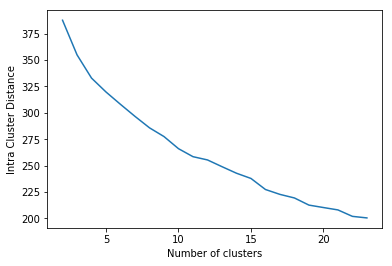

In [243]:
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

In [248]:
kmeans = KMeans(n_clusters=15, max_iter=100).fit(df_components)
kmeans.predict(df_components)

array([ 6,  6,  0,  4,  4,  4,  5, 14, 13, 13, 11,  6,  7,  7,  2,  7, 13,
        9,  5, 10,  1, 10, 10, 14,  0,  8, 13, 11, 11,  4,  5,  9,  9,  9,
        9, 13,  1,  5,  1,  0,  0,  3, 14,  3,  3,  1, 14,  3,  8,  5,  4,
        8,  1, 13,  6,  6,  1,  5,  7,  8,  8,  5,  5,  8,  8,  1,  1,  1,
        5,  6,  6,  4, 11, 13,  4,  7,  7, 13, 10,  5,  5,  1,  1,  3,  2,
       12,  7,  7,  8, 12,  6, 10, 12, 13,  7,  7,  2, 12, 11, 14, 10, 14,
       14, 12, 13,  8, 13, 12,  3,  3,  1,  5,  3,  2,  5, 14,  5,  6, 10,
       14,  7,  5,  1,  1, 11,  2,  1,  1, 14,  2, 13,  2, 13,  2, 13, 14,
        2, 13,  2,  9, 14, 10,  1,  9,  2,  3,  3,  6, 13,  5,  4],
      dtype=int32)

In [258]:
centroids = pd.DataFrame(kmeans.cluster_centers_.transpose(), columns = [i for i in range(0, 15)])
# kmeans.cluster_centers_.transpose()
centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.277942,-0.628380,-0.414480,-0.523052,1.246560,0.454564,0.943832,-0.047530,-0.336437,0.224723,-0.980625,0.730943,1.014112,-0.153385,-0.793067
1,0.059593,-0.448993,0.105471,0.836237,0.074391,0.467693,-0.869368,0.980467,-0.430838,-0.449253,-0.053593,0.641382,0.434639,-0.457322,-0.332135
2,0.781948,-0.347749,0.093566,0.122369,-0.203243,-0.332051,0.110677,-0.190025,-0.360793,-0.020304,0.557779,0.152243,0.645932,-0.059046,0.294667
3,0.894484,0.407611,-0.684236,0.493979,-0.219198,0.583626,0.040472,-0.415403,-0.406759,-0.047927,0.064644,-0.354275,-0.329140,-0.551830,0.422392
4,0.016719,-0.109002,-0.532563,-0.364262,0.128073,-0.094673,0.262218,0.483969,-0.048759,-0.760141,0.597124,-0.292829,-0.038695,0.201124,0.298775
5,0.218985,0.205637,0.077579,0.408538,-0.170859,-0.198496,0.345652,-0.124079,-0.085855,-0.350409,0.280807,0.296866,-0.031153,-0.094085,-0.497431
6,0.521672,0.023769,0.283897,-0.351147,0.042885,0.144921,-0.300828,-0.073271,0.489813,-0.516130,0.112938,0.144043,-0.065985,-0.160952,-0.045146
7,-0.038193,0.032598,-0.238620,0.068311,-0.009906,0.046410,-0.020516,0.321668,0.159721,0.406852,-0.162353,0.008304,-0.561439,-0.046809,-0.114588
8,-0.186776,-0.085480,-0.232166,0.065034,-0.258769,0.020677,0.080447,-0.018605,0.722996,0.023116,-0.117649,0.022421,0.236828,-0.177279,0.066385
9,0.005535,-0.008041,-0.046145,0.105982,0.104753,-0.006222,-0.306207,0.044518,0.116718,0.117106,0.002304,-0.214416,0.403501,-0.133722,0.042717


In [264]:
distances_df = pd.DataFrame(KMeans(n_clusters=15).fit_transform(df_components))
distances_df = distances_df.apply(np.min, axis=1)

In [267]:
distances_df[distances_df > distances_df.quantile(1-OUTLIERS_FRACTION)]

2      1.630630
11     1.623602
15     1.650611
17     1.660179
31     1.652442
57     1.641715
58     1.622475
74     1.564984
87     1.679673
89     1.833287
91     1.660058
117    1.623266
122    1.663939
123    1.756777
143    1.663287
dtype: float64

#### 2.4. Isolation Forest

Ansambli u službi otkrivanja anomalija. Ovo je prilagođena verzija algoritma Random Forest. Pravi slučajnu šumu stabala odlučivanja i kao anomaly_score posmatra koliko je obzervacija izolovana od ostalih (tako što meri sa još koliko drugih tačaka se našla u listu).

[Više o algoritmu](http://www.extended-cognition.com/2018/11/15/multivariate-outlier-detection-with-isolation-forests/) [Originalni Rad](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tkdd11.pdf)

[Python implementacija](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest)

In [216]:
from pyod.models.iforest import IForest

In [217]:
forest_model = IForest(contamination=OUTLIERS_FRACTION, random_state=2019)

In [220]:
forest_model.fit(scaled_df)

result_df['forest_score'] = forest_model.decision_scores_
result_df['forest_proba'] = forest_model.predict_proba(scaled_df)[:,1]
result_df['forest_outlier'] = forest_model.predict(scaled_df)

In [221]:
result_df.query('forest_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier,forest_score,forest_proba,forest_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,0.044972,1.000000,1,0.044972,1.000000,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,0.571429,0.773585,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,0.044223,0.994651,1,0.044223,0.994651,1
15,0.0,0.5,0.5,0.769231,0.950,0.645833,0.955882,0.666667,1.000000,0.853659,0.693878,0.764706,1.0,1.0,0.250000,0.595745,0.673913,0.46,0.425532,0.745098,0.627907,0.461538,0.693878,1.0,0.0,0.972973,1.000000,0.977273,0.893617,0.957447,1.000000,1.000000,0.963636,0.931034,1.0,0.000000,0.974359,1.000000,1.00,1.000000,0.955556,1.000000,0.973684,0.944444,0.942308,0.92,0.500000,0.250000,0.651007,1.935124,0.602688,0,0.005761,0.720198,1,0.005761,0.720198,1
31,0.0,1.0,0.5,0.846154,0.900,0.958333,1.000000,0.851852,1.000000,0.853659,0.938776,0.921569,0.0,0.0,0.250000,0.319149,0.347826,0.84,0.595745,0.607843,0.465116,0.288462,0.224490,0.0,0.0,0.000000,0.282609,0.090909,0.085106,0.531915,0.000000,0.339623,0.509091,0.310345,0.0,0.000000,0.230769,0.139535,0.38,0.849057,0.555556,0.393939,0.394737,0.203704,0.192308,0.84,0.722222,0.833333,0.812081,2.034240,0.657813,0,0.023573,0.847300,1,0.023573,0.847300,1
39,0.0,1.0,0.5,0.435897,0.625,0.729167,0.794118,0.481481,0.377778,0.097561,0.081633,0.137255,1.0,1.0,0.250000,0.659574,0.543478,0.62,0.361702,0.450980,0.255814,0.115385,0.183673,1.0,1.0,0.324324,0.347826,0.204545,0.361702,0.297872,0.357143,0.415094,0.309091,0.431034,1.0,0.333333,0.230769,0.697674,0.62,0.509434,0.311111,0.303030,0.210526,0.074074,0.000000,0.96,0.777778,0.666667,0.147651,2.062535,0.690478,0,0.009629,0.747800,1,0.009629,0.747800,1
40,0.0,1.0,0.5,0.358974,0.350,0.479167,0.867647,0.296296,0.488889,0.292683,0.265306,0.333333,1.0,1.0,0.250000,0.425532,0.413043,0.74,0.255319,0.431373,0.348837,0.250000,0.367347,1.0,1.0,0.351351,0.391304,0.454545,0.808511,0.382979,0.690476,0.849057,0.509091,0.568966,1.0,0.333333,0.205128,0.046512,0.14,0.641509,0.133333,0.000000,0.421053,0.314815,0.230769,0.96,0.722222,0.416667,0.073826,1.985295,0.637717,0,0.003921,0.707070,1,0.003921,0.707070,1
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,0.690476,0.754717,0.272727,0.431034,1.0,0.000000,0.564103,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1,0.011890,0.763938,1,0.011890,0.763938,1
62,0.0,1.0,0.0,0.743590,0.725,0.562500,0.750000,1.000000,0.777778,0.902439,0.755102,0.745098,0.0,0.0,0.750000,0.723404,0.630435,0.60,0.978723,0.960784,0.930233,0.384615,0.653061,1.0,1.0,0.189189,0.152174,0.022727,0.340426,0.319149,0.452381,0.584906,0.200000,0.568966,1.0,0.333333,0.666667,0.325581,0.56,0.698113,0.911111,0.757576,0.763158,0.444444,0.000000,0.40,0.333333,0.583333,0.593960,1.887090,0.545123,0,0.00327

## 3. Deep Learning based Anomaly Detection

### 3.1. Autoencoders

Slično kao ranije korišćena PCA analiza, autoenkoderi su metod koji se koristi za učenje boljih reprezentacija podataka na nenadgledan način. Ovaj tip neuronske mreže može se koristiti za otkrivanje izuzetaka tako što bi nakon naučenih reprezentacija računali grešku u rekonstrukciji pravih vrednosti podataka. Što je veća greška, to sa većom sigurnošću možemo smatrati da je ta obzervacija zapravo izuzetak. U paketu PyOD postoji implementiran ovaj metod, a za detaljniji uvid u metod, može se koristiti odeljak [Outliers Analysis iz knjige Data Mining](https://link.springer.com/chapter/10.1007/978-3-319-14142-8_8).

In [269]:
from pyod.models import auto_encoder
autoencoder = auto_encoder.AutoEncoder(hidden_neurons=[64,32,32,64])
autoencoder.fit(scaled_df)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 49)                2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 49)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 49)                2450      
_________________________________________________________________
dropout_2 (Dropout)          (None, 49)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

Epoch 59/100
135/135 [==============================] - 0s 95us/step - loss: 13.4453 - val_loss: 10.7984
Epoch 60/100
135/135 [==============================] - 0s 87us/step - loss: 13.1854 - val_loss: 10.6331
Epoch 61/100
135/135 [==============================] - 0s 82us/step - loss: 12.8801 - val_loss: 10.4781
Epoch 62/100
135/135 [==============================] - 0s 90us/step - loss: 12.5136 - val_loss: 10.3237
Epoch 63/100
135/135 [==============================] - 0s 84us/step - loss: 12.2349 - val_loss: 10.1801
Epoch 64/100
135/135 [==============================] - 0s 86us/step - loss: 12.0833 - val_loss: 10.0442
Epoch 65/100
135/135 [==============================] - 0s 81us/step - loss: 11.9569 - val_loss: 9.9026
Epoch 66/100
135/135 [==============================] - 0s 77us/step - loss: 11.7261 - val_loss: 9.7582
Epoch 67/100
135/135 [==============================] - 0s 77us/step - loss: 11.3872 - val_loss: 9.6390
Epoch 68/100
135/135 [==============================] - 0s

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f4d35be2620>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [270]:
result_df['autoencoder_score'] = autoencoder.decision_scores_
result_df['autoencoder_proba'] = autoencoder.predict_proba(scaled_df)[:,1]
result_df['autoencoder_outlier'] = autoencoder.predict(scaled_df)

In [271]:
result_df.query('autoencoder_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,...,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier,forest_score,forest_proba,forest_outlier,autoencoder_score,autoencoder_proba,autoencoder_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,...,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,0.044972,1.000000,1,0.044972,1.000000,1,12.655736,1.000000,1
5,0.0,1.0,0.0,0.384615,0.550,0.395833,0.661765,0.277778,0.333333,0.341463,0.408163,0.274510,0.0,0.0,0.083333,0.468085,0.282609,0.58,0.404255,0.509804,0.279070,0.000000,0.204082,1.0,0.0,0.297297,0.413043,0.409091,0.829787,0.446809,...,0.622642,0.490909,0.551724,1.0,0.000000,0.384615,0.488372,0.56,0.849057,0.177778,0.272727,0.368421,0.555556,0.557692,0.88,0.222222,0.166667,0.093960,1.806730,0.468315,0,-0.023088,0.514341,0,-0.023088,0.514341,0,8.887606,0.546471,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,...,0.773585,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,0.044223,0.994651,1,0.044223,0.994651,1,11.752478,0.891285,1
31,0.0,1.0,0.5,0.846154,0.900,0.958333,1.000000,0.851852,1.000000,0.853659,0.938776,0.921569,0.0,0.0,0.250000,0.319149,0.347826,0.84,0.595745,0.607843,0.465116,0.288462,0.224490,0.0,0.0,0.000000,0.282609,0.090909,0.085106,0.531915,...,0.339623,0.509091,0.310345,0.0,0.000000,0.230769,0.139535,0.38,0.849057,0.555556,0.393939,0.394737,0.203704,0.192308,0.84,0.722222,0.833333,0.812081,2.034240,0.657813,0,0.023573,0.847300,1,0.023573,0.847300,1,10.028921,0.683839,1
39,0.0,1.0,0.5,0.435897,0.625,0.729167,0.794118,0.481481,0.377778,0.097561,0.081633,0.137255,1.0,1.0,0.250000,0.659574,0.543478,0.62,0.361702,0.450980,0.255814,0.115385,0.183673,1.0,1.0,0.324324,0.347826,0.204545,0.361702,0.297872,...,0.415094,0.309091,0.431034,1.0,0.333333,0.230769,0.697674,0.62,0.509434,0.311111,0.303030,0.210526,0.074074,0.000000,0.96,0.777778,0.666667,0.147651,2.062535,0.690478,0,0.009629,0.747800,1,0.009629,0.747800,1,10.005945,0.681073,1
40,0.0,1.0,0.5,0.358974,0.350,0.479167,0.867647,0.296296,0.488889,0.292683,0.265306,0.333333,1.0,1.0,0.250000,0.425532,0.413043,0.74,0.255319,0.431373,0.348837,0.250000,0.367347,1.0,1.0,0.351351,0.391304,0.454545,0.808511,0.382979,...,0.849057,0.509091,0.568966,1.0,0.333333,0.205128,0.046512,0.14,0.641509,0.133333,0.000000,0.421053,0.314815,0.230769,0.96,0.722222,0.416667,0.073826,1.985295,0.637717,0,0.003921,0.707070,1,0.003921,0.707070,1,9.357516,0.603029,1
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,...,0.754717,0.272727,0.431034,1.0,0.000000,0.564103,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1,0.011890,0.763938,1,0.011890,0.763938,1,9.392545,0.607245,1
57,1.0,1.0,0.0,0.410256,0.675,0.875000,0.661765,0.351852,0.600000,0.756098,0.530612,0.333333,0.0,1.0,0.416667,0.510638,0.369565,0.70,0.468085,0.647059,0.558140,0.615385,0.591837,1.0,1.0,0.054054,0.043478,0.136364,0.148936,0.000000,...,0.396226,0.000000,0